1. libreria y cargue de datos.

2. extraccion de caracteristicas y preprocesamiento de datos.

3. Preparacion de datos para el modelo (seleccion de caracteristicas, dividir los datos entrenamiento)

4. Entrenar el modelo(3 modelos)

5. Validacion del modelo.

6. Salvar el modelo seleccionado.

OJO LA MATRIX DE CONFUSION(falso positivos y falsos negativos)

In [ ]:
!pip install --upgrade scikit-learn
!pip install --upgrade joblib


In [ ]:
  #1 #TRATAMIENTO DE DATOS
import pandas as pd
import numpy as np

#SISTEMA OPERATIVO
import os

#GRAFICO
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

#LEER ARCHIVOS DE WEB
import urllib

#MAPA DE CALOR

import plotly.express as px

from sklearn import preprocessing
import joblib as jb

#!pip install --upgrade scikit-learn

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Delitos proyecto/Delito Bucaramanga_preprocesar.csv')


In [ ]:
df

,Unnamed: 0,DESCRIPCION_CONDUCTA,ARMAS_MEDIOS,BARRIOS_HECHO,FECHA_HECHO,HORA_HECHO,EDAD,GENERO,MOVIL_VICTIMA,MOVIL_AGRESOR,...,NOM_COM,CANTIDAD_UNICA,DIA_NOMBRE,DIA_NOMBRE_ORDEN,Comuna,FECHA_COMPLETA,lat,lon,RangoEdad,rangoHORARIO
0,0,ARTÍCULO 239. HURTO PERSONAS,ARMA BLANCA / CORTOPUNZANTE,MALPASO,2019-06-17,08:30:00 p. m.,21,MASCULINO,A PIE,A PIE,...,SUR,1,lunes,1,"Comuna Sur, Bucaramanga, Colombia",17/06/2019 08:30:00 p. m.,7.083413,-73.132530,JUVENTUD,NOCHE
1,1,ARTÍCULO 239. HURTO PERSONAS,ARMA BLANCA / CORTOPUNZANTE,CIUDAD VENECIA,2019-01-30,11:15:00 p. m.,21,MASCULINO,A PIE,A PIE,...,SUR,1,miércoles,3,"Comuna Sur, Bucaramanga, Colombia",30/01/2019 11:15:00 p. m.,7.083413,-73.132530,JUVENTUD,NOCHE
2,2,ARTÍCULO 239. HURTO PERSONAS,ARMA BLANCA / CORTOPUNZANTE,CIUDAD VENECIA,2019-01-30,06:00:00 p. m.,21,MASCULINO,A PIE,A PIE,...,SUR,1,miércoles,3,"Comuna Sur, Bucaramanga, Colombia",30/01/2019 06:00:00 p. m.,7.083413,-73.132530,JUVENTUD,TARDE
3,3,ARTÍCULO 239. HURTO PERSONAS,ARMA BLANCA / CORTOPUNZANTE,DELICIAS,2019-08-25,03:45:00 p. m.,24,MASCULINO,A PIE,A PIE,...,SUR,1,domingo,7,"Comuna Sur, Bucaramanga, Colombia",25/08/2019 03:45:00 p. m.,7.083413,-73.132530,JUVENTUD,TARDE
4,4,ARTÍCULO 239. HURTO PERSONAS,ARMA BLANCA / CORTOPUNZANTE,EL ROCÍO,2019-03-27,11:00:00 p. m.,23,MASCULINO,A PIE,A PIE,...,SUR,1,miércoles,3,"Comuna Sur, Bucaramanga, Colombia",27/03/2019 11:00:00 p. m.,7.083413,-73.132530,JUVENTUD,NOCHE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97564,97564,ARTÍCULO 111. LESIONES PERSONALES,ARMA BLANCA / CORTOPUNZANTE,CAPILLA PARTE ALTA,2023-03-17,07:22:00 p. m.,53,MASCULINO,A PIE,A PIE,...,CENTRO,1,viernes,5,"Comuna Centro, Bucaramanga, Colombia",17/03/2023 07:22:00 p. m.,7.118130,-73.126312,ADULTEZ,TARDE
97565,97565,ARTÍCULO 111. LESIONES PERSONALES,CONTUNDENTES,RETIRO GRANDE PARTE BAJA,2023-03-27,05:25:00 p. m.,44,MASCULINO,A PIE,A PIE,...,CENTRO,1,lunes,1,"Comuna Centro, Bucaramanga, Colombia",27/03/2023 05:25:00 p. m.,7.118130,-73.126312,ADULTEZ,TARDE
97566,97566,ARTÍCULO 229. VIOLENCIA INTRAFAMILIAR,CONTUNDENTES,LOS SANTOS,2023-11-03,10:50:00 p. m.,18,FEMENINO,A PIE,A PIE,...,CENTRO,1,sábado,6,"Comuna Centro, Bucaramanga, Colombia",11/03/2023 10:50:00 p. m.,7.118130,-73.126312,ADOLECENCIA,NOCHE
97567,97567,ARTÍCULO 229. VIOLENCIA INTRAFAMILIAR,CONTUNDENTES,LOS SANTOS,2023-03-22,08:00:00 a. m.,49,FEMENINO,A PIE,A PIE,...,CENTRO,1,miércoles,3,"Comuna Centro, Bucaramanga, Colombia",22/03/2023 08:00:00 a. m.,7.118130,-73.126312,ADULTEZ,MAÑANA


In [ ]:
df.EDAD.value_counts()
#df.isna().sum()

30     12723
25      2854
26      2832
28      2828
23      2778
       ...  
92        11
94         4
93         3
95         2
125        1
Name: EDAD, Length: 97, dtype: int64

In [ ]:
df.columns

Index(['Unnamed: 0', 'DESCRIPCION_CONDUCTA', 'ARMAS_MEDIOS', 'BARRIOS_HECHO',
       'FECHA_HECHO', 'HORA_HECHO', 'EDAD', 'GENERO', 'MOVIL_VICTIMA',
       'MOVIL_AGRESOR', 'CLASE_SITIO', 'ARTICULO', 'DELITO_SOLO', 'CURSO_VIDA',
       'CURSO_VIDA_ORDEN', 'AÑO_NUM', 'MES_NUM', 'DIA_NUM', 'RANGO_HORARIO',
       'TIPOLOGÍA', 'RANGO_HORARIO_ORDEN', 'NUM_COM', 'NOM_COM',
       'CANTIDAD_UNICA', 'DIA_NOMBRE', 'DIA_NOMBRE_ORDEN', 'Comuna',
       'FECHA_COMPLETA', 'lat', 'lon', 'RangoEdad', 'rangoHORARIO'],
      dtype='object')

In [ ]:
df.drop(['Unnamed: 0', 'BARRIOS_HECHO','DESCRIPCION_CONDUCTA', 'ARMAS_MEDIOS',
        'MOVIL_VICTIMA','FECHA_HECHO','HORA_HECHO', 'DELITO_SOLO',
       'MOVIL_AGRESOR', 'CLASE_SITIO',  'CURSO_VIDA', 'RangoEdad',
       'CURSO_VIDA_ORDEN', 'AÑO_NUM', 'DIA_NUM', 'RANGO_HORARIO','rangoHORARIO',
        'NUM_COM','CANTIDAD_UNICA', 'DIA_NOMBRE_ORDEN','Comuna','FECHA_COMPLETA','lat', 'lon'],axis=1,inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97569 entries, 0 to 97568
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   EDAD                 97569 non-null  int64 
 1   GENERO               97569 non-null  object
 2   ARTICULO             97569 non-null  object
 3   MES_NUM              97569 non-null  int64 
 4   TIPOLOGÍA            97568 non-null  object
 5   RANGO_HORARIO_ORDEN  97569 non-null  int64 
 6   NOM_COM              97569 non-null  object
 7   DIA_NOMBRE           97569 non-null  object
dtypes: int64(3), object(5)
memory usage: 6.0+ MB


In [ ]:
df['TIPOLOGIA2']=df['ARTICULO']

In [ ]:
df["TIPOLOGIA2"].value_counts()

ARTÍCULO 239      58576
ARTÍCULO 111      14376
ARTÍCULO 229      13585
ARTÍCULO 347       3970
ARTÍCULO 120       2193
ARTÍCULO 209       1389
ARTÍCULO 103        808
ARTÍCULO 208        587
ARTÍCULO 244        484
ARTÍCULO 205        380
ARTÍCULO 206        243
ARTÍCULO 210        209
ARTÍCULO 210 A      187
ARTÍCULO 109        159
ARTÍCULO 218        108
ARTÍCULO 219 A       94
ARTÍCULO 207         83
ARTÍCULO 213         39
ARTÍCULO 104A        23
ARTÍCULO 211         22
ARTÍCULO 217 A       21
ARTÍCULO 217         10
ARTÍCULO 213 A        6
ARTÍCULO 214          5
ARTÍCULO 343          4
ARTÍCULO 125          3
ARTÍCULO 243          2
ARTÍCULO 265          1
ARTÍCULO 429          1
ARTÍCULO 350          1
Name: TIPOLOGIA2, dtype: int64

In [ ]:
dicDelitos={"ARTÍCULO 239":"DELITOS CONTRA EL PATRIMONIO ECONOMICO",

            "ARTÍCULO 243":"DELITOS CONTRA EL PATRIMONIO ECONOMICO",

            "ARTÍCULO 244":"DELITOS CONTRA EL PATRIMONIO ECONOMICO",

            "ARTÍCULO 265":"DELITOS CONTRA EL PATRIMONIO ECONOMICO",

            "ARTÍCULO 229":"DELITOS CONTRA LA FAMILIA",

            "ARTÍCULO 343":"OTROS DELITOS",

            "ARTÍCULO 347":"OTROS DELITOS",

            "ARTÍCULO 350":"OTROS DELITOS",

            "ARTÍCULO 103":"DELITOS CONTRA LA VIDA Y LA INTEGRIDAD PERSONAL",

            "ARTÍCULO 104A":"DELITOS CONTRA LA VIDA Y LA INTEGRIDAD PERSONAL",

            "ARTÍCULO 109":"DELITOS CONTRA LA VIDA Y LA INTEGRIDAD PERSONAL",

            "ARTÍCULO 111":"DELITOS CONTRA LA VIDA Y LA INTEGRIDAD PERSONAL",

            "ARTÍCULO 120":"DELITOS CONTRA LA VIDA Y LA INTEGRIDAD PERSONAL",

            "ARTÍCULO 125":"DELITOS CONTRA LA VIDA Y LA INTEGRIDAD PERSONAL",

            "ARTÍCULO 429":"DELITOS CONTRA LA VIDA Y LA INTEGRIDAD PERSONAL",

            'ARTÍCULO 209':'DELITOS DE ACTOS SEXUALES ABUSIVOS VIOLACIÓN Y EXPLOTACION SEXUAL',

            'ARTÍCULO 208':'DELITOS DE ACTOS SEXUALES ABUSIVOS VIOLACIÓN Y EXPLOTACION SEXUAL',

            'ARTÍCULO 210 A':'DELITOS DE ACTOS SEXUALES ABUSIVOS VIOLACIÓN Y EXPLOTACION SEXUAL',

            'ARTÍCULO 210':'DELITOS DE ACTOS SEXUALES ABUSIVOS VIOLACIÓN Y EXPLOTACION SEXUAL',

            'ARTÍCULO 218':'DELITOS DE ACTOS SEXUALES ABUSIVOS VIOLACIÓN Y EXPLOTACION SEXUAL',

            'ARTÍCULO 205':'DELITOS DE ACTOS SEXUALES ABUSIVOS VIOLACIÓN Y EXPLOTACION SEXUAL',

            'ARTÍCULO 206':'DELITOS DE ACTOS SEXUALES ABUSIVOS VIOLACIÓN Y EXPLOTACION SEXUAL',

            'ARTÍCULO 210':'DELITOS DE ACTOS SEXUALES ABUSIVOS VIOLACIÓN Y EXPLOTACION SEXUAL',

            'ARTÍCULO 206':'DELITOS DE ACTOS SEXUALES ABUSIVOS VIOLACIÓN Y EXPLOTACION SEXUAL',

            'ARTÍCULO 213 A':'DELITOS DE ACTOS SEXUALES ABUSIVOS VIOLACIÓN Y EXPLOTACION SEXUAL',
            'ARTÍCULO 219 A':'DELITOS DE ACTOS SEXUALES ABUSIVOS VIOLACIÓN Y EXPLOTACION SEXUAL',
            'ARTÍCULO 207':'DELITOS DE ACTOS SEXUALES ABUSIVOS VIOLACIÓN Y EXPLOTACION SEXUAL',
            'ARTÍCULO 211':'DELITOS DE ACTOS SEXUALES ABUSIVOS VIOLACIÓN Y EXPLOTACION SEXUAL',
            'ARTÍCULO 214':'DELITOS DE ACTOS SEXUALES ABUSIVOS VIOLACIÓN Y EXPLOTACION SEXUAL',
            'ARTÍCULO 217 A':'DELITOS DE ACTOS SEXUALES ABUSIVOS VIOLACIÓN Y EXPLOTACION SEXUAL',
            'ARTÍCULO 229':'A VIOLENCIA INTRAFAMILIAR',
            'ARTÍCULO 347':'OTROS DELITOS',
            'ARTÍCULO 244':'OTROS DELITOS',
            'ARTÍCULO 213':'DELITOS DE ACTOS SEXUALES ABUSIVOS VIOLACIÓN Y EXPLOTACION SEXUAL',

            'ARTÍCULO 217':'DELITOS DE ACTOS SEXUALES ABUSIVOS VIOLACIÓN Y EXPLOTACION SEXUAL'}

df["TIPOLOGIA2"].replace( dicDelitos, regex=True,inplace=True)

In [ ]:
df["TIPOLOGIA2"].value_counts()

DELITOS CONTRA EL PATRIMONIO ECONOMICO                               58579
DELITOS CONTRA LA VIDA Y LA INTEGRIDAD PERSONAL                      17563
A VIOLENCIA INTRAFAMILIAR                                            13585
OTROS DELITOS                                                         4459
DELITOS DE ACTOS SEXUALES ABUSIVOS VIOLACIÓN Y EXPLOTACION SEXUAL     3383
Name: TIPOLOGIA2, dtype: int64

In [ ]:
df.drop(["TIPOLOGÍA","ARTICULO"],axis=1,inplace=True)

In [ ]:
df=df[df['TIPOLOGIA2']!="OTROS DELITOS"]

In [ ]:
print(df.isnull().sum())

EDAD                   0
GENERO                 0
MES_NUM                0
RANGO_HORARIO_ORDEN    0
NOM_COM                0
DIA_NOMBRE             0
TIPOLOGIA2             0
dtype: int64


In [ ]:
print(df.GENERO.value_counts())

FEMENINO        43102
MASCULINO       40664
SIN REGISTRO     9344
Name: GENERO, dtype: int64


In [ ]:
df.GENERO.replace('SIN REGISTRO', 'FEMENINO' ,inplace=True,regex=True)

<ipython-input-19-23c074f1a9e2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.GENERO.replace('SIN REGISTRO', 'FEMENINO' ,inplace=True,regex=True)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 93110 entries, 0 to 97568
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   EDAD                 93110 non-null  int64 
 1   GENERO               93110 non-null  object
 2   MES_NUM              93110 non-null  int64 
 3   RANGO_HORARIO_ORDEN  93110 non-null  int64 
 4   NOM_COM              93110 non-null  object
 5   DIA_NOMBRE           93110 non-null  object
 6   TIPOLOGIA2           93110 non-null  object
dtypes: int64(3), object(4)
memory usage: 5.7+ MB


In [ ]:
dfn=df.copy()


In [ ]:
dfn.columns

Index(['EDAD', 'GENERO', 'MES_NUM', 'RANGO_HORARIO_ORDEN', 'NOM_COM',
       'DIA_NOMBRE', 'TIPOLOGIA2'],
      dtype='object')

In [ ]:
#print(df.RangoEdad.value_counts())

In [ ]:
#1. vamos a binalizar la edad por rango de edades

#2. borrar la columna edad
#3. generar la variable categorica de la edad con label encoder
#4. salvar el archivo

#codEdad=preprocessing.LabelEncoder()
#dfn['RangoEdad']=codEdad.fit_transform(dfn['RangoEdad'])
#print(codEdad.classes_)

In [ ]:
dfn.to_csv("/content/drive/MyDrive/Delitos proyecto/delitos_minable.csv")

In [ ]:

#2.1. generar la variable categorica de la edad con label encoder del nombre de la comuna (NOM_COM)
#2.2. borar la columna (NOM_COM)
#4. salvar el archivo
codComuna=preprocessing.LabelEncoder()
dfn['NOM_COM']=codComuna.fit_transform(dfn['NOM_COM'])
print(codComuna.classes_)

['CABECERA DEL LLANO' 'CENTRO' 'GARCIA ROVIRA' 'LA CIUDADELA'
 'LA CONCORDIA' 'LA PEDREGOSA' 'LAGOS DEL CACIQUE' 'MORRORICO' 'MUTIS'
 'NORORIENTAL' 'NORTE' 'OCCIDENTAL' 'ORIENTAL' 'PROVENZA' 'SAN FRANCISCO'
 'SUR' 'SUROCCIDENTE']


In [ ]:
jb.dump(codComuna,'/content/drive/MyDrive/Delitos proyecto/codComuna.bin',compress=True)

['/content/drive/MyDrive/Delitos proyecto/codComuna.bin']

In [ ]:
#dias de la semana y hacemos una transformación con replace
#no se guarda ningun archivo,solo categorizar en numeros

codDia=preprocessing.LabelEncoder()
dfn['DIA_NOMBRE']=codDia.fit_transform(dfn['DIA_NOMBRE'])
print(codDia.classes_)

['domingo' 'jueves' 'lunes' 'martes' 'miércoles' 'sábado' 'viernes']


In [ ]:
jb.dump(codDia,'/content/drive/MyDrive/Delitos proyecto/codDia.bin',compress=True)

['/content/drive/MyDrive/Delitos proyecto/codDia.bin']

In [ ]:
#hacemos con replace 0 y 1 para hombre y mujer
#quitar localidad
#quitar columna comuna
#eliminanos fecha_completa
#eliminar barrios hechos
#rangos de edad numerizar

codGenero=preprocessing.LabelEncoder()
dfn['GENERO']=codGenero.fit_transform(dfn['GENERO'])
print(codGenero.classes_)

['FEMENINO' 'MASCULINO']


In [ ]:
jb.dump(codGenero,'/content/drive/MyDrive/Delitos proyecto/codGenero.bin',compress=True)

['/content/drive/MyDrive/Delitos proyecto/codGenero.bin']

In [ ]:
#codHorario=preprocessing.LabelEncoder()
#dfn['rangoHORARIO']=codHorario.fit_transform(dfn['rangoHORARIO'])
#print(codHorario.classes_)

In [ ]:
#jb.dump(codHorario,'codHorario.bin',compress=True)

In [ ]:
dfn

,EDAD,GENERO,MES_NUM,RANGO_HORARIO_ORDEN,NOM_COM,DIA_NOMBRE,TIPOLOGIA2
0,21,1,6,20,15,2,DELITOS CONTRA EL PATRIMONIO ECONOMICO
1,21,1,1,23,15,4,DELITOS CONTRA EL PATRIMONIO ECONOMICO
2,21,1,1,18,15,4,DELITOS CONTRA EL PATRIMONIO ECONOMICO
3,24,1,8,15,15,0,DELITOS CONTRA EL PATRIMONIO ECONOMICO
4,23,1,3,23,15,4,DELITOS CONTRA EL PATRIMONIO ECONOMICO
...,...,...,...,...,...,...,...
97564,53,1,3,19,1,6,DELITOS CONTRA LA VIDA Y LA INTEGRIDAD PERSONAL
97565,44,1,3,17,1,2,DELITOS CONTRA LA VIDA Y LA INTEGRIDAD PERSONAL
97566,18,0,3,22,1,5,A VIOLENCIA INTRAFAMILIAR
97567,49,0,3,8,1,4,A VIOLENCIA INTRAFAMILIAR


In [ ]:
#seleccionamos columnas usando select kabest

#separe el set de entrenamiento y de prueba
from sklearn.model_selection import train_test_split
X=dfn.drop(['TIPOLOGIA2'],axis=1)#features
y=dfn['TIPOLOGIA2']#label
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.8,random_state=1234,shuffle=True)


In [ ]:
X_train

,EDAD,GENERO,MES_NUM,RANGO_HORARIO_ORDEN,NOM_COM,DIA_NOMBRE
58729,26,1,10,19,14,2
6760,31,1,12,0,13,1
67748,56,0,4,16,9,5
88953,23,1,9,22,5,0
54691,19,0,3,5,11,6
...,...,...,...,...,...,...
93589,19,1,12,16,6,5
63336,30,0,8,3,14,1
35721,59,0,12,10,0,6
60431,25,1,2,18,14,0


In [ ]:
#entrene con arbol de decision

#entrene con svm(svc)

#entrene con naive bayes

from sklearn.metrics import confusion_matrix

from sklearn.metrics import ConfusionMatrixDisplay

from sklearn.metrics import classification_report

from sklearn.metrics import accuracy_score

from sklearn.feature_selection import SelectKBest

from sklearn.feature_selection import f_classif

from sklearn import tree

In [ ]:
selector = SelectKBest(f_classif, k=5)
best_train = selector.fit_transform(X_train, y_train)
best_test = selector.transform(X_test)
best_test

array([[22,  1,  3,  0,  3],
       [41,  1, 19,  9,  4],
       [49,  1, 14, 14,  4],
       ...,
       [42,  1,  8, 10,  3],
       [51,  0, 15, 14,  2],
       [55,  1, 11, 11,  4]])

In [ ]:
print(X_train.columns)
X_train.columns[selector.get_support()]  #Las columnas recomendadas

Index(['EDAD', 'GENERO', 'MES_NUM', 'RANGO_HORARIO_ORDEN', 'NOM_COM',
       'DIA_NOMBRE'],
      dtype='object')


Index(['EDAD', 'GENERO', 'RANGO_HORARIO_ORDEN', 'NOM_COM', 'DIA_NOMBRE'], dtype='object')

In [ ]:
#Arbol de decison
from sklearn.naive_bayes import GaussianNB

In [ ]:
modeloNb=GaussianNB()
modeloNb.fit(X_train,y_train)


GaussianNB()

In [ ]:
#guardando modelo comentado
jb.dump(modeloNb,"/content/drive/MyDrive/Delitos proyecto/ModeloNB.bin",compress=True)

['/content/drive/MyDrive/Delitos proyecto/ModeloNB.bin']

In [ ]:
#accuracy del set de entrenamiento

modeloNb.score(X_train,y_train)*100

63.60353345505316

In [ ]:
#accuracy del set de prueba

modeloNb.score(X_test,y_test)*100

63.51090108473848

In [ ]:
#confusion_matrix con los datos de prueba
y_predict=modeloNb.predict(X_test)
print(y_test.head(20))
print(pd.DataFrame(y_predict).head(20))

35623               DELITOS CONTRA EL PATRIMONIO ECONOMICO
69549      DELITOS CONTRA LA VIDA Y LA INTEGRIDAD PERSONAL
58212               DELITOS CONTRA EL PATRIMONIO ECONOMICO
25267               DELITOS CONTRA EL PATRIMONIO ECONOMICO
41003               DELITOS CONTRA EL PATRIMONIO ECONOMICO
4921                DELITOS CONTRA EL PATRIMONIO ECONOMICO
54471                            A VIOLENCIA INTRAFAMILIAR
59943                            A VIOLENCIA INTRAFAMILIAR
50915                            A VIOLENCIA INTRAFAMILIAR
88865                            A VIOLENCIA INTRAFAMILIAR
88542               DELITOS CONTRA EL PATRIMONIO ECONOMICO
31218               DELITOS CONTRA EL PATRIMONIO ECONOMICO
21088               DELITOS CONTRA EL PATRIMONIO ECONOMICO
83715      DELITOS CONTRA LA VIDA Y LA INTEGRIDAD PERSONAL
92870    DELITOS DE ACTOS SEXUALES ABUSIVOS VIOLACIÓN Y...
37885               DELITOS CONTRA EL PATRIMONIO ECONOMICO
39436               DELITOS CONTRA EL PATRIMONIO ECONOMI

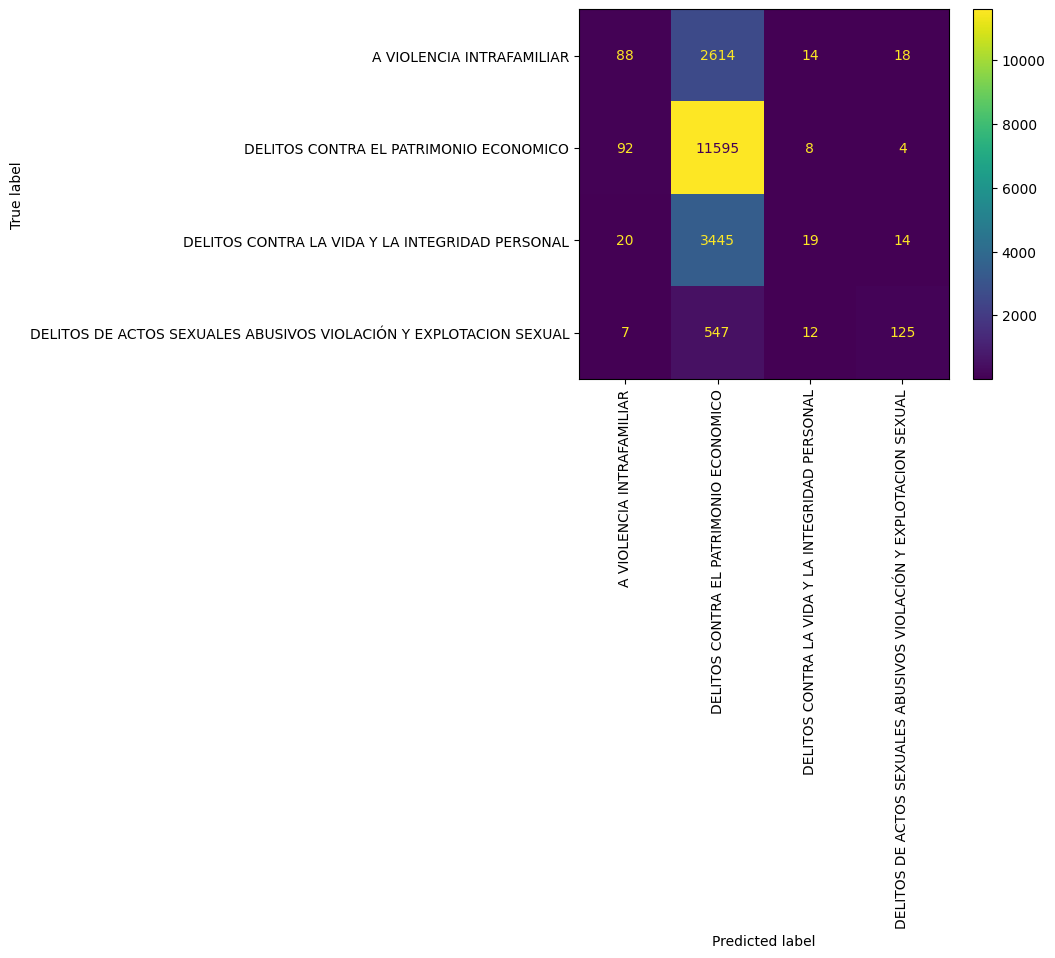

In [ ]:
#matrix de confusión para analizar los errores de predicción
matrix=confusion_matrix(y_test,y_predict,labels=modeloNb.classes_)
displaymatrix=ConfusionMatrixDisplay(confusion_matrix=matrix,display_labels=modeloNb.classes_)
displaymatrix.plot(xticks_rotation='vertical')

In [ ]:
print(classification_report(y_test,y_predict))

                                                                   precision    recall  f1-score   support

                                        A VIOLENCIA INTRAFAMILIAR       0.43      0.03      0.06      2734
                           DELITOS CONTRA EL PATRIMONIO ECONOMICO       0.64      0.99      0.78     11699
                  DELITOS CONTRA LA VIDA Y LA INTEGRIDAD PERSONAL       0.36      0.01      0.01      3498
DELITOS DE ACTOS SEXUALES ABUSIVOS VIOLACIÓN Y EXPLOTACION SEXUAL       0.78      0.18      0.29       691

                                                         accuracy                           0.64     18622
                                                        macro avg       0.55      0.30      0.28     18622
                                                     weighted avg       0.56      0.64      0.51     18622



In [ ]:
modeloArbol=tree.DecisionTreeClassifier()

                                            #criterion='entropy',
                                            #min_samples_split=10,
                                            #min_samples_leaf=5,
                                            #max_depth = 4
modeloArbol.fit(X_train,y_train)

DecisionTreeClassifier()

In [ ]:
#accuracy del set de entrenamiento

modeloArbol.score(X_train,y_train)*100

98.80114917839114

In [ ]:
#accuracy del set de prueba
#accuracy_score(y_test,y_predict)

modeloArbol.score(X_test,y_test)*100
#X_test

55.885511760283535

In [ ]:
#confusion_matrix con los datos de prueba
y_predict=modeloArbol.predict(X_test)
print(y_test.head(20))
print(pd.DataFrame(y_predict).head(20))

35623               DELITOS CONTRA EL PATRIMONIO ECONOMICO
69549      DELITOS CONTRA LA VIDA Y LA INTEGRIDAD PERSONAL
58212               DELITOS CONTRA EL PATRIMONIO ECONOMICO
25267               DELITOS CONTRA EL PATRIMONIO ECONOMICO
41003               DELITOS CONTRA EL PATRIMONIO ECONOMICO
4921                DELITOS CONTRA EL PATRIMONIO ECONOMICO
54471                            A VIOLENCIA INTRAFAMILIAR
59943                            A VIOLENCIA INTRAFAMILIAR
50915                            A VIOLENCIA INTRAFAMILIAR
88865                            A VIOLENCIA INTRAFAMILIAR
88542               DELITOS CONTRA EL PATRIMONIO ECONOMICO
31218               DELITOS CONTRA EL PATRIMONIO ECONOMICO
21088               DELITOS CONTRA EL PATRIMONIO ECONOMICO
83715      DELITOS CONTRA LA VIDA Y LA INTEGRIDAD PERSONAL
92870    DELITOS DE ACTOS SEXUALES ABUSIVOS VIOLACIÓN Y...
37885               DELITOS CONTRA EL PATRIMONIO ECONOMICO
39436               DELITOS CONTRA EL PATRIMONIO ECONOMI

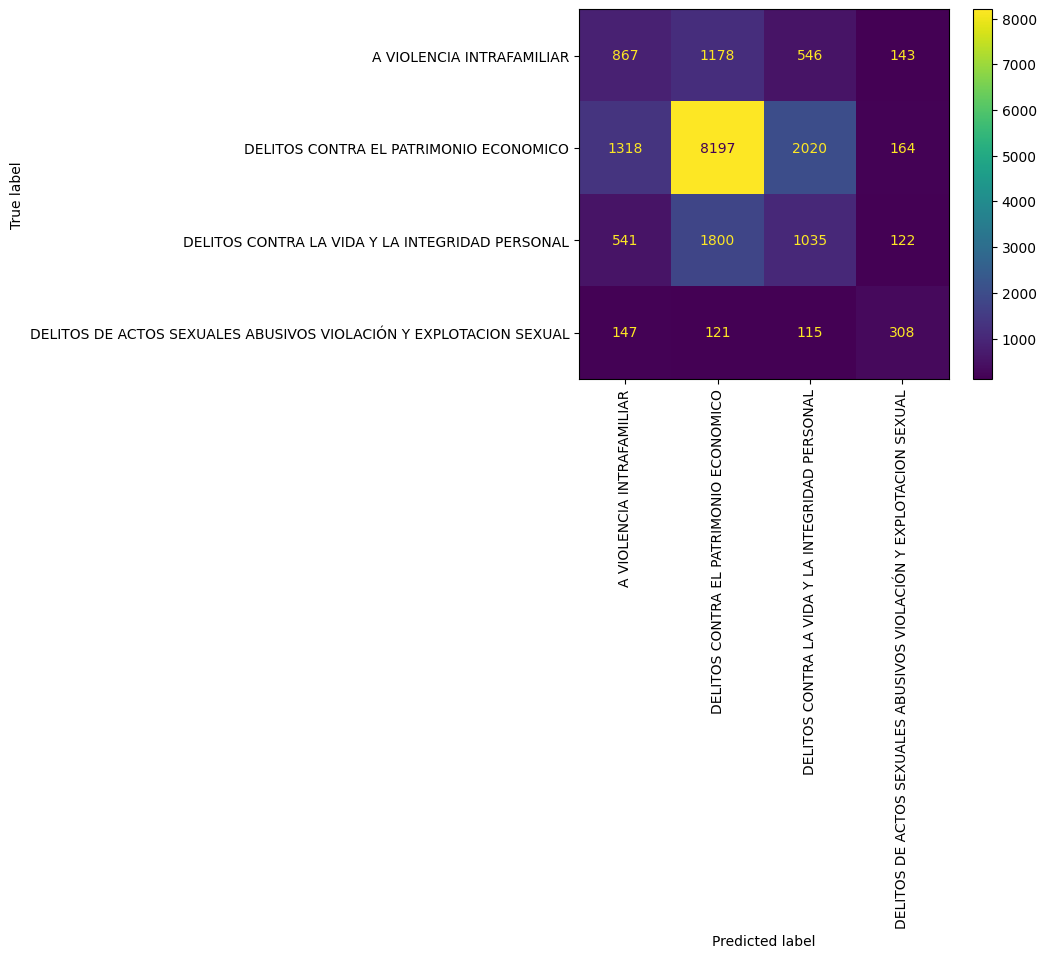

In [ ]:
#matrix de confusión para analizar los errores de predicción
matrix=confusion_matrix(y_test,y_predict,labels=modeloArbol.classes_)
displaymatrix=ConfusionMatrixDisplay(confusion_matrix=matrix,display_labels=modeloArbol.classes_)
displaymatrix.plot(xticks_rotation='vertical')

In [ ]:
print(classification_report(y_test,y_predict))

                                                                   precision    recall  f1-score   support

                                        A VIOLENCIA INTRAFAMILIAR       0.30      0.32      0.31      2734
                           DELITOS CONTRA EL PATRIMONIO ECONOMICO       0.73      0.70      0.71     11699
                  DELITOS CONTRA LA VIDA Y LA INTEGRIDAD PERSONAL       0.28      0.30      0.29      3498
DELITOS DE ACTOS SEXUALES ABUSIVOS VIOLACIÓN Y EXPLOTACION SEXUAL       0.42      0.45      0.43       691

                                                         accuracy                           0.56     18622
                                                        macro avg       0.43      0.44      0.44     18622
                                                     weighted avg       0.57      0.56      0.56     18622



In [ ]:
#tree.plot_tree(modeloArbol)
#tree.plot_tree(modeloArbol)
#plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
#Defino el algoritmo a utilizar
modeloBA= RandomForestClassifier(random_state=0)
#Entreno el modelo
modeloBA.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [ ]:
jb.dump(modeloArbol,"/content/drive/MyDrive/Delitos proyecto/modeloArbol.bin",compress=True)

['/content/drive/MyDrive/Delitos proyecto/modeloArbol.bin']

In [ ]:
#accuracy del set de entrenamiento

modeloBA.score(X_train,y_train)*100

98.79846418215014

In [ ]:
modeloBA.score(X_test,y_test)*100

65.56760820534852

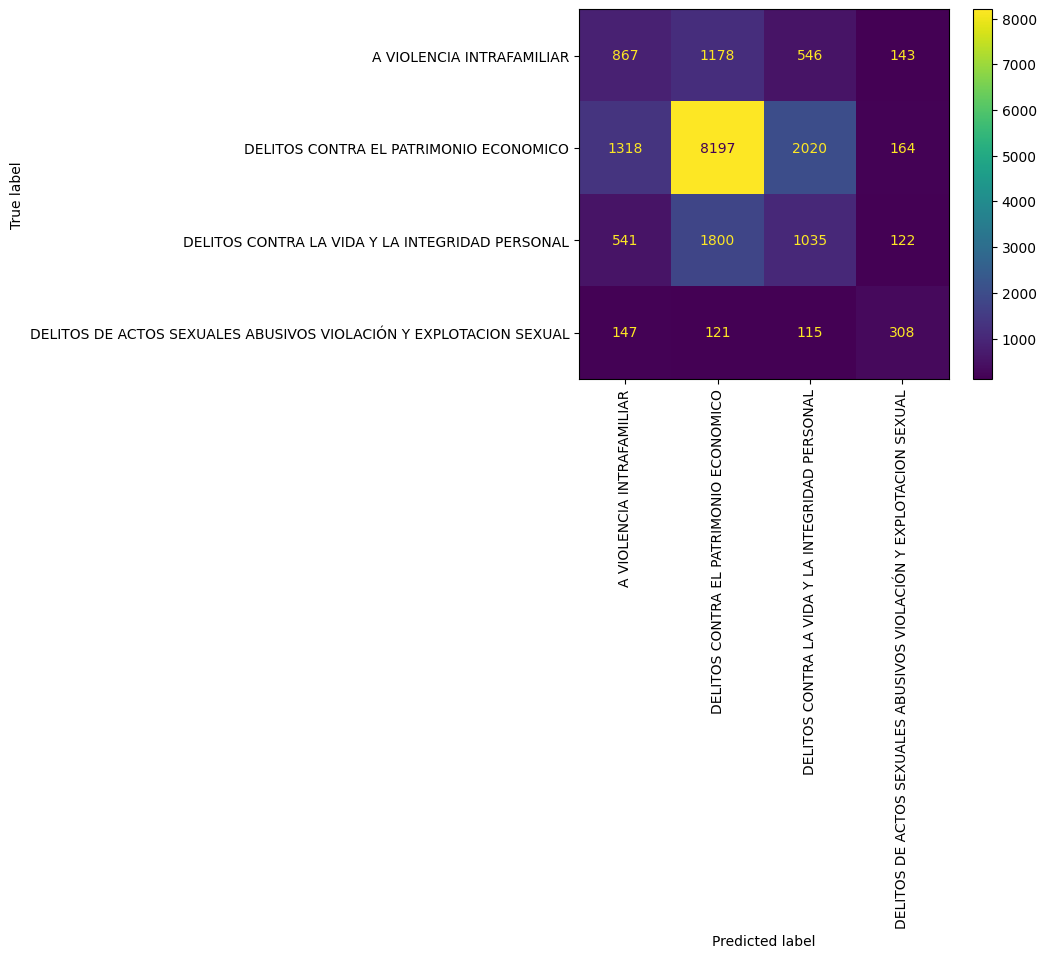

In [ ]:
#matrix de confusión para analizar los errores de predicción
matrix=confusion_matrix(y_test,y_predict,labels=modeloBA.classes_)
displaymatrix=ConfusionMatrixDisplay(confusion_matrix=matrix,display_labels=modeloBA.classes_)
displaymatrix.plot(xticks_rotation='vertical')

In [ ]:
#confusion_matrix con los datos de prueba
y_predict=modeloBA.predict(X_test)
print(y_test.head(20))
print(pd.DataFrame(y_predict).head(20))

35623               DELITOS CONTRA EL PATRIMONIO ECONOMICO
69549      DELITOS CONTRA LA VIDA Y LA INTEGRIDAD PERSONAL
58212               DELITOS CONTRA EL PATRIMONIO ECONOMICO
25267               DELITOS CONTRA EL PATRIMONIO ECONOMICO
41003               DELITOS CONTRA EL PATRIMONIO ECONOMICO
4921                DELITOS CONTRA EL PATRIMONIO ECONOMICO
54471                            A VIOLENCIA INTRAFAMILIAR
59943                            A VIOLENCIA INTRAFAMILIAR
50915                            A VIOLENCIA INTRAFAMILIAR
88865                            A VIOLENCIA INTRAFAMILIAR
88542               DELITOS CONTRA EL PATRIMONIO ECONOMICO
31218               DELITOS CONTRA EL PATRIMONIO ECONOMICO
21088               DELITOS CONTRA EL PATRIMONIO ECONOMICO
83715      DELITOS CONTRA LA VIDA Y LA INTEGRIDAD PERSONAL
92870    DELITOS DE ACTOS SEXUALES ABUSIVOS VIOLACIÓN Y...
37885               DELITOS CONTRA EL PATRIMONIO ECONOMICO
39436               DELITOS CONTRA EL PATRIMONIO ECONOMI

In [ ]:
print(classification_report(y_test,y_predict))

                                                                   precision    recall  f1-score   support

                                        A VIOLENCIA INTRAFAMILIAR       0.44      0.33      0.38      2734
                           DELITOS CONTRA EL PATRIMONIO ECONOMICO       0.73      0.86      0.79     11699
                  DELITOS CONTRA LA VIDA Y LA INTEGRIDAD PERSONAL       0.40      0.23      0.29      3498
DELITOS DE ACTOS SEXUALES ABUSIVOS VIOLACIÓN Y EXPLOTACION SEXUAL       0.62      0.57      0.60       691

                                                         accuracy                           0.66     18622
                                                        macro avg       0.55      0.50      0.51     18622
                                                     weighted avg       0.62      0.66      0.63     18622



In [ ]:
jb.dump(modeloBA,"/content/drive/MyDrive/Delitos proyecto/modeloBA.bin",compress=True)

['/content/drive/MyDrive/Delitos proyecto/modeloBA.bin']

In [ ]:
#SVM FALTA CAMBIAR
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

In [ ]:
modeloSvm = SVC(kernel = 'linear')
modeloSvm.fit(X_train, y_train)

SVC(kernel='linear')

In [ ]:
#accuracy del set de entrenamiento
modeloSvm.score(X_train,y_train)*100

64.97019654172485

In [ ]:
#accuracy del set de prueba

modeloSvm.score(X_test,y_test)*100

64.90172913757921

In [ ]:
#confusion_matrix con los datos de prueba
y_predict=modeloSvm.predict(X_test)
print(y_test.head(20))
print(pd.DataFrame(y_predict).head(20))

35623               DELITOS CONTRA EL PATRIMONIO ECONOMICO
69549      DELITOS CONTRA LA VIDA Y LA INTEGRIDAD PERSONAL
58212               DELITOS CONTRA EL PATRIMONIO ECONOMICO
25267               DELITOS CONTRA EL PATRIMONIO ECONOMICO
41003               DELITOS CONTRA EL PATRIMONIO ECONOMICO
4921                DELITOS CONTRA EL PATRIMONIO ECONOMICO
54471                            A VIOLENCIA INTRAFAMILIAR
59943                            A VIOLENCIA INTRAFAMILIAR
50915                            A VIOLENCIA INTRAFAMILIAR
88865                            A VIOLENCIA INTRAFAMILIAR
88542               DELITOS CONTRA EL PATRIMONIO ECONOMICO
31218               DELITOS CONTRA EL PATRIMONIO ECONOMICO
21088               DELITOS CONTRA EL PATRIMONIO ECONOMICO
83715      DELITOS CONTRA LA VIDA Y LA INTEGRIDAD PERSONAL
92870    DELITOS DE ACTOS SEXUALES ABUSIVOS VIOLACIÓN Y...
37885               DELITOS CONTRA EL PATRIMONIO ECONOMICO
39436               DELITOS CONTRA EL PATRIMONIO ECONOMI

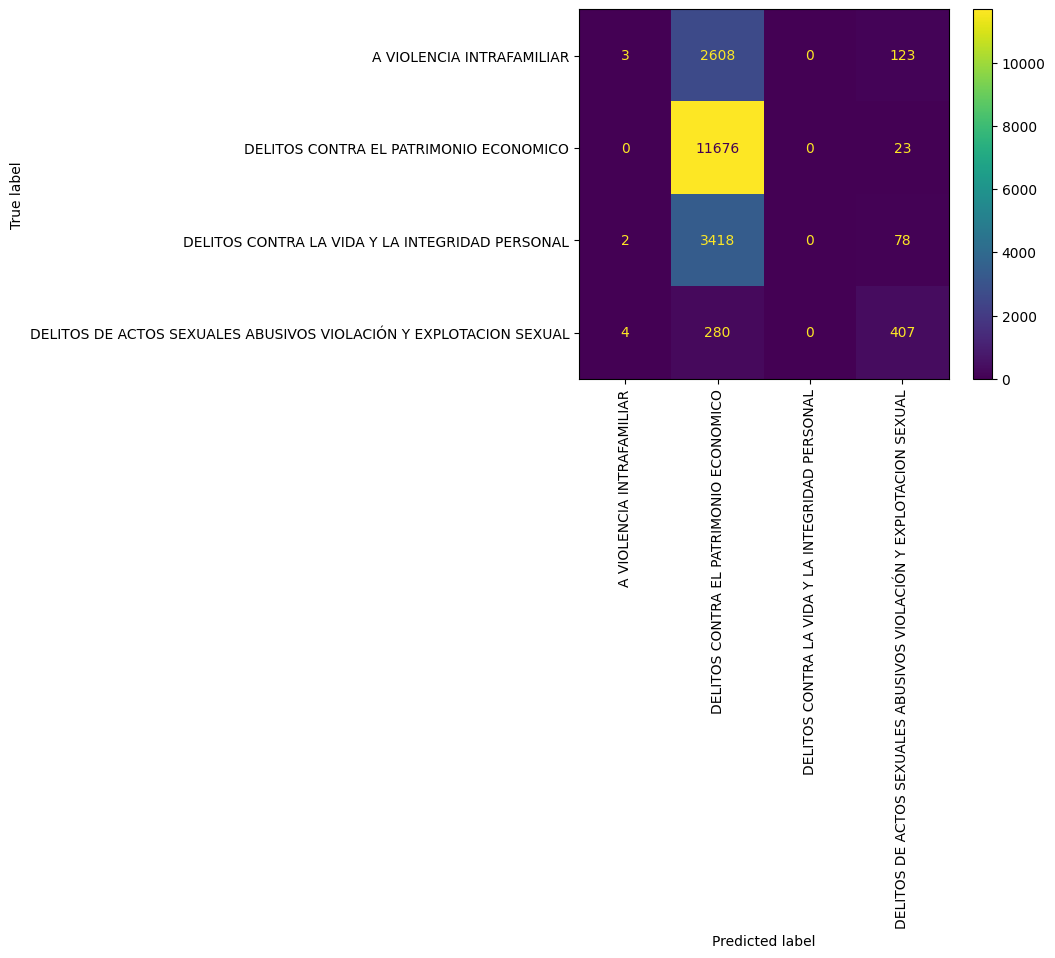

In [ ]:
#matrix de confusión para analizar los errores de predicción
matrix=confusion_matrix(y_test,y_predict,labels=modeloSvm.classes_)
displaymatrix=ConfusionMatrixDisplay(confusion_matrix=matrix,display_labels=modeloSvm.classes_)
displaymatrix.plot(xticks_rotation='vertical')

In [ ]:
#confusion_matrix con los datos de prueba
y_predict=modeloSvm.predict(X_test)
print(y_test.head(20))
print(pd.DataFrame(y_predict).head(20))

35623               DELITOS CONTRA EL PATRIMONIO ECONOMICO
69549      DELITOS CONTRA LA VIDA Y LA INTEGRIDAD PERSONAL
58212               DELITOS CONTRA EL PATRIMONIO ECONOMICO
25267               DELITOS CONTRA EL PATRIMONIO ECONOMICO
41003               DELITOS CONTRA EL PATRIMONIO ECONOMICO
4921                DELITOS CONTRA EL PATRIMONIO ECONOMICO
54471                            A VIOLENCIA INTRAFAMILIAR
59943                            A VIOLENCIA INTRAFAMILIAR
50915                            A VIOLENCIA INTRAFAMILIAR
88865                            A VIOLENCIA INTRAFAMILIAR
88542               DELITOS CONTRA EL PATRIMONIO ECONOMICO
31218               DELITOS CONTRA EL PATRIMONIO ECONOMICO
21088               DELITOS CONTRA EL PATRIMONIO ECONOMICO
83715      DELITOS CONTRA LA VIDA Y LA INTEGRIDAD PERSONAL
92870    DELITOS DE ACTOS SEXUALES ABUSIVOS VIOLACIÓN Y...
37885               DELITOS CONTRA EL PATRIMONIO ECONOMICO
39436               DELITOS CONTRA EL PATRIMONIO ECONOMI

In [ ]:
!pip install scikit-learn==1.3.0
import sklearn
sklearn.__version__



'1.3.0'